# Simple Regression with Neural Networks

**Install all essential libraries**
* tensorflow is our general purpose ml library with all the utlities we need
* numpy has all our various data types like arrays, matrices etc.
* matplotlib for plotting and visualising the numpy array of values
* math is just for math functions and mathematical constants

In [20]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import math

**Library diagnostic information**

In [6]:
print('Numpy ' + np.__version__)
print('Tensorflow ' + tf.__version__)

Numpy 1.26.2
Tensorflow 2.15.0


**Model Training Parameters**
* training - to train the model.
* validation - to verify and tune the model.
* test - unseen data to see the performance of the model.

In [7]:
nsamples = 1000
val_ratio = 0.2     # 20% of data is for validation
test_ratio = 0.2    # 20% of data is for testing, overall 600 samples for training
tflite_model_name = 'sine_model'
c_model_name = 'sine_model'

**generate some sample data**

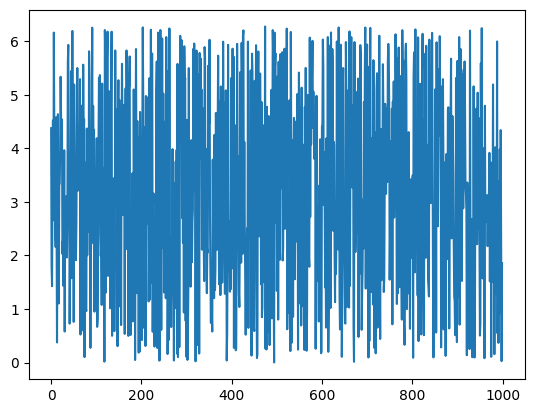

In [8]:
np.random.seed(123)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)      # this will generate uniform distribution of random ness
plt.plot(x_values)

**Obtain output samples with noise** (for estimation)

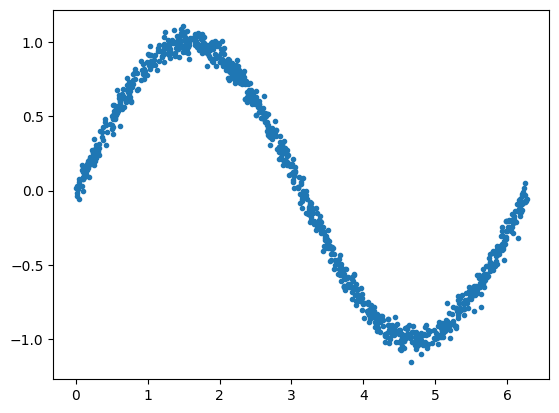

In [9]:
y_values = np.sin(x_values) + (0.05 * np.random.randn(x_values.shape[0]))    # add some noise just to make the model guess a little
plt.plot(x_values, y_values, '.')

**split the data across training, validation and test sets**

In [10]:
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

# check samples intact
assert(x_train.size + x_val.size + x_test.size == nsamples)

**show all the different data samples in the distribution**

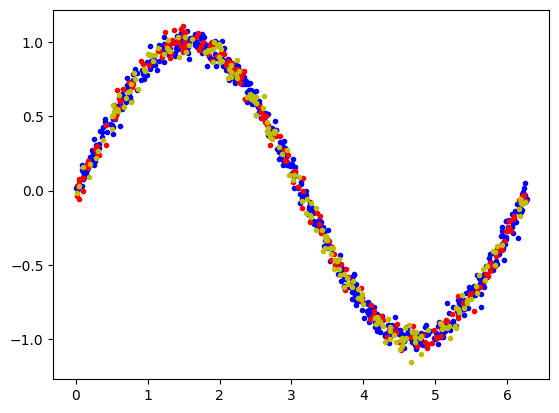

In [11]:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")

**Create the skeleton for the neural network model**

In [12]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

2023-12-18 15:44:27.914419: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-18 15:44:27.940018: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-18 15:44:27.940240: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2177 (8.50 KB)
Trainable params: 2177 (8.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Optimizer and Loss function and metrics**

In [14]:
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

**Train the model**

In [15]:
with tf.device('/GPU:0'):
  history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size=100,
                    validation_data=(x_val, y_val),
                  )

Epoch 1/500


2023-12-18 15:44:28.532844: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-18 15:44:28.640450: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f54e1643a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-18 15:44:28.640477: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-12-18 15:44:28.644318: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-18 15:44:28.652014: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1702894468.693137   99067 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6/6 [==============================] - 1s 22ms/step - loss: 0.5594 - mae: 0.5594 - val_loss: 0.5497 - val_mae: 0.5497
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5276 - mae: 0.5276 - val_loss: 0.5149 - val_mae: 0.5149
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5106 - mae: 0.5106 - val_loss: 0.4934 - val_mae: 0.4934
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4883 - mae: 0.4883 - val_loss: 0.4761 - val_mae: 0.4761
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4534 - mae: 0.4534 - val_loss: 0.4288 - val_mae: 0.4288
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4247 - mae: 0.4247 - val_loss: 0.4213 - val_mae: 0.4213
Epoch 7/500
6/6 [==============================] - 0s 7ms/step - loss: 0.4058 - mae: 0.4058 - val_loss: 0.3928 - val_mae: 0.3928
Epoch 8/500
6/6 [==============================] - 0s 6ms/step - loss: 0.3777 - mae: 0.3777 - val_loss: 0.36

**Observe training history**

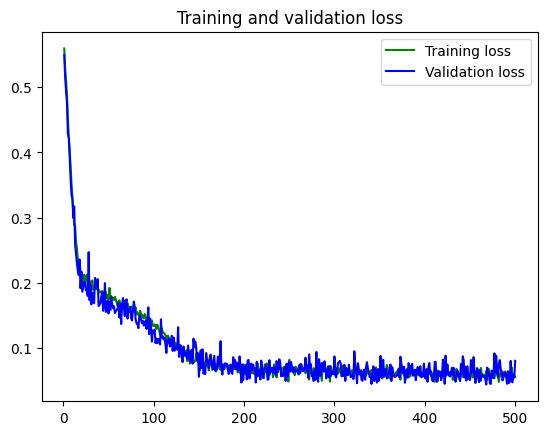

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**plot the predictions against actual values**

7/7 [==============================] - 0s 2ms/step


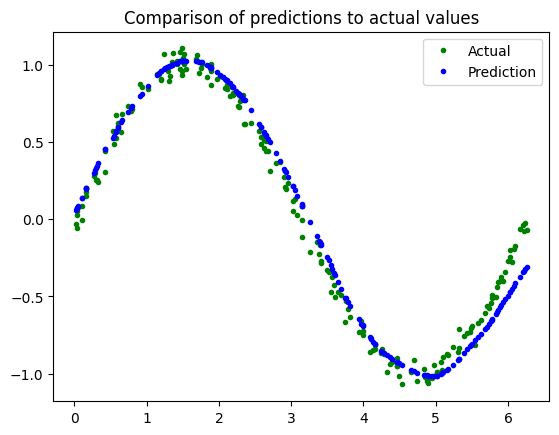

In [17]:
predictions = model.predict(x_test)

plt.clf()
plt.title('Comparison of predictions to actual values')
plt.plot(x_test, y_test, 'g.', label='Actual')
plt.plot(x_test, predictions, 'b.', label='Prediction')
plt.legend()
plt.show()

**Convert and optimize it as a tflite model**

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpb8zdobza/assets


INFO:tensorflow:Assets written to: /tmp/tmpb8zdobza/assets
2023-12-18 15:49:55.661558: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-12-18 15:49:55.661580: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-12-18 15:49:55.661691: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpb8zdobza
2023-12-18 15:49:55.662428: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-12-18 15:49:55.662438: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpb8zdobza
2023-12-18 15:49:55.664560: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-12-18 15:49:55.692476: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmpb8zdobza
2023-12-18 15:49:55.700617: I tensorflow/cc/saved_model/loader.cc:316] SavedModel

8416